In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<font color = "blue">
<font size = 5>
1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [2]:
df = pd.read_excel("Election_Data.xlsx",sheet_name=1)

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


* There are 1525 rows and 9 columns.
* Vote is the target variable with Labour and Conservative categories.
* Other than age in the remaining 8, all are categorical variable.

In [6]:
df.shape

(1525, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


* Vote and Gender are object. 
* All 7 are integer datatype but other than age, all should be changed to category datatype.
* There is no null values.

In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
df.duplicated().sum()

8

In [10]:
df[df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


* Duplicates are not treated as the id column or unique voter id is not present. They might be genuine duplicates.

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["economic.cond.national"] = pd.Categorical(df["economic.cond.national"])
df["economic.cond.household"] = pd.Categorical(df["economic.cond.household"])
df["Blair"] = pd.Categorical(df["Blair"])
df["Hague"] = pd.Categorical(df["Hague"])
df["Europe"] = pd.Categorical(df["Europe"])
df["political.knowledge"] = pd.Categorical(df["political.knowledge"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   object  
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   category
 3   economic.cond.household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   political.knowledge      1525 non-null   category
 8   gender                   1525 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 46.2+ KB


* The 6 variables are changed to category.

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,5.0,3.0,607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1525.0,5.0,3.0,648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1525.0,5.0,4.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1525.0,5.0,2.0,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1525.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1525.0,4.0,2.0,782.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations-**
* `vote:` Vote has two category with labour having 2/3rd of the data.
* `age:` age is an continous variable with mean of 54 and range of 24 to 93.
* `gender:` 53% of the voters are females.
 * `economic.cond.national:` National Economic condition is neutral mostly
 * `economic.cond.household:` Household Economic condition is neutral mostly
 * `Blair:` More than 50% of the voters feel more good towards blair.
 * `Hague:` Around 40% of the voters are not too sure about hague and 45% of the voters feels good about hague. 
 * `Europe:` The attitude towards the European integration is not popular among the voters as only 29% feels strongly about that and other remaining voters feels neutral or not strongly about the European integration.
 * `political.knowledge:` Most of the voters have political knowledge as the survey have 67% have 2 and above.  

In [15]:
num = list(df.dtypes[df.dtypes == 'int64'].index)
num

['age']

In [16]:
from scipy.stats import skew
for i in num:
    print('Skewness in {} = {}'.format(i,skew(df[i])))
    print()

Skewness in age = 0.14447848346551462



* The age is slightly rightly skewed. we can also see the range of age is 24 to 93.

<font color = "blue">
<font size = 5>
1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts).

# EDA

## Univariate

In [17]:
cat = list(df.dtypes[df.dtypes != 'int64'].index)

for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print(i," in Percentage")
    print(df[i].value_counts(normalize=True)*100)
    print('*'*100)

VOTE
Labour          1063
Conservative     462
Name: vote, dtype: int64
vote  in Percentage
Labour          69.704918
Conservative    30.295082
Name: vote, dtype: float64
****************************************************************************************************
ECONOMIC.COND.NATIONAL
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64
economic.cond.national  in Percentage
3    39.803279
4    35.540984
2    16.852459
5     5.377049
1     2.426230
Name: economic.cond.national, dtype: float64
****************************************************************************************************
ECONOMIC.COND.HOUSEHOLD
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64
economic.cond.household  in Percentage
3    42.491803
4    28.852459
2    18.360656
5     6.032787
1     4.262295
Name: economic.cond.household, dtype: float64
*************************************************************************************

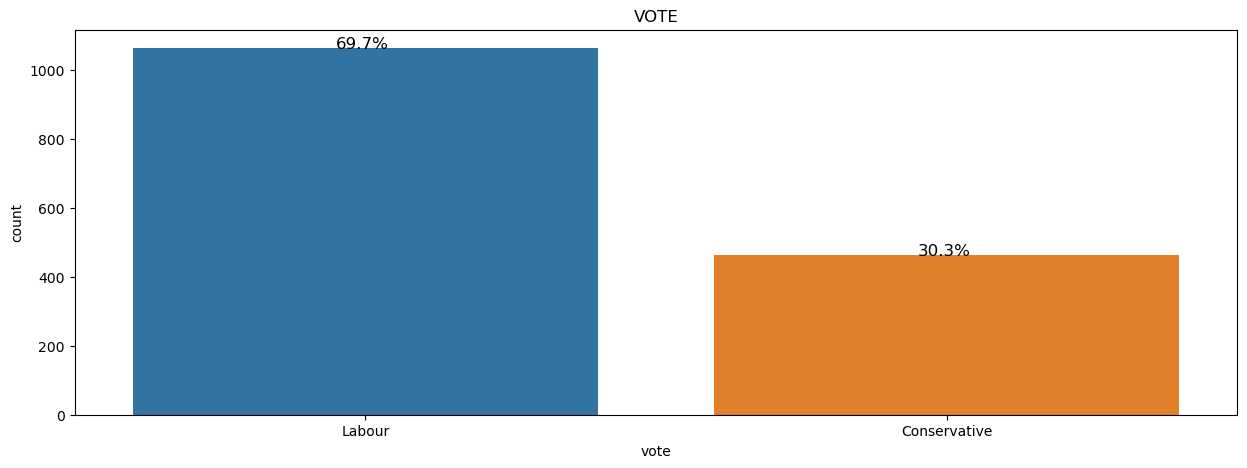

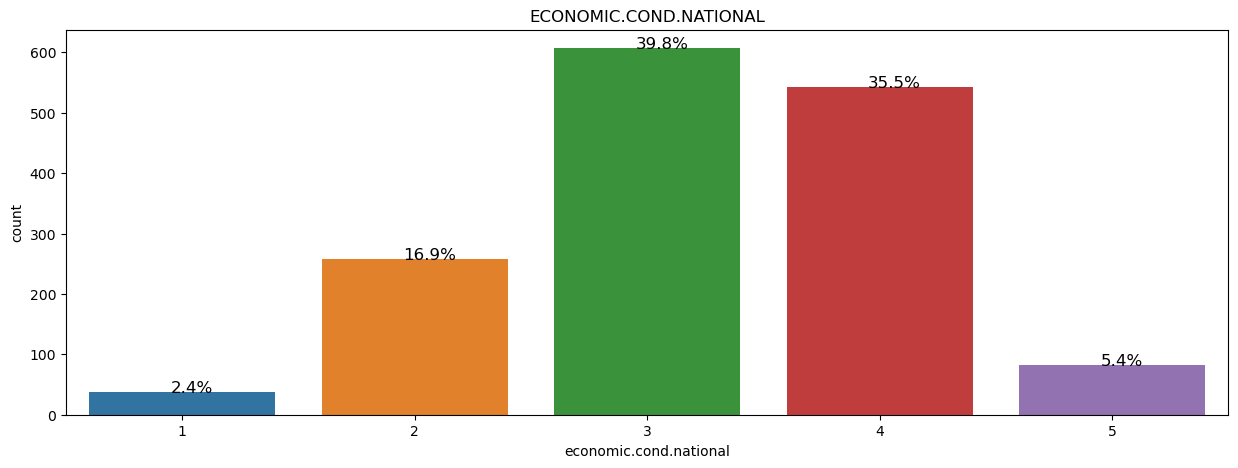

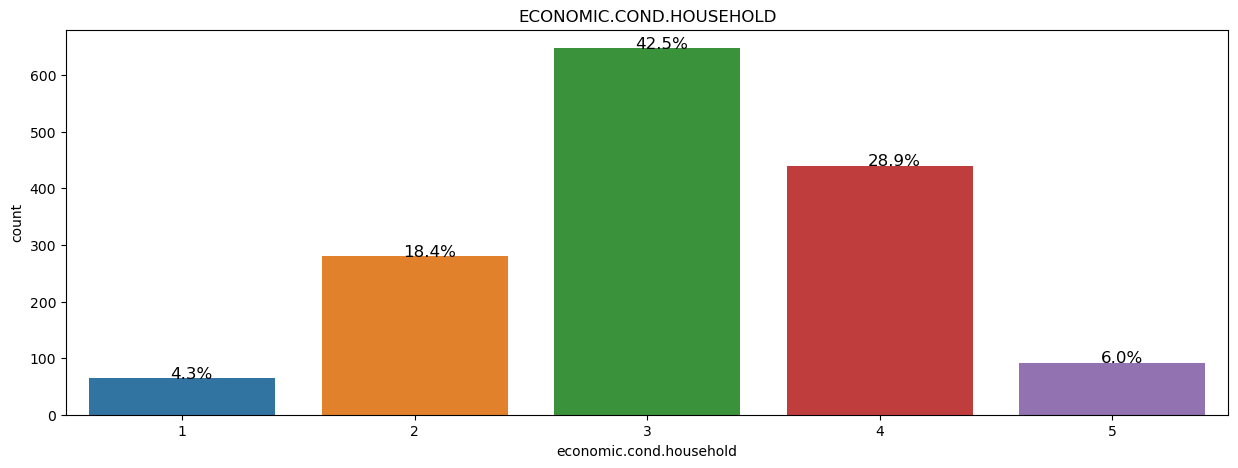

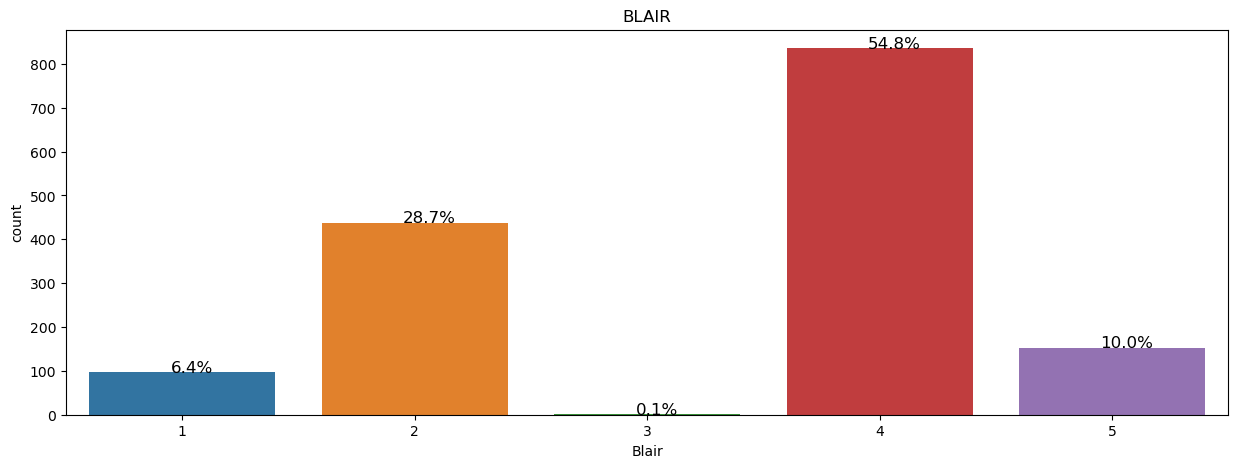

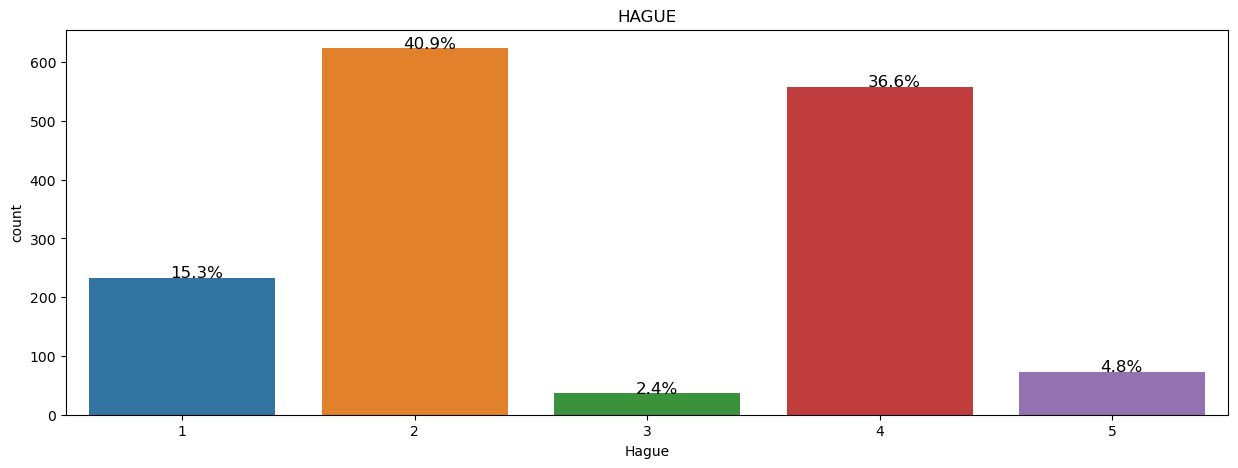

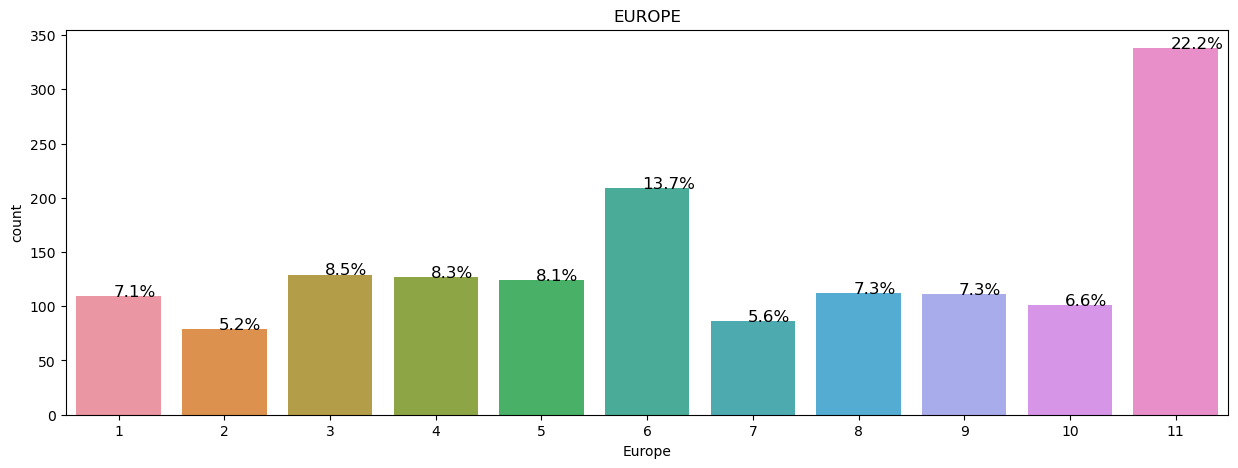

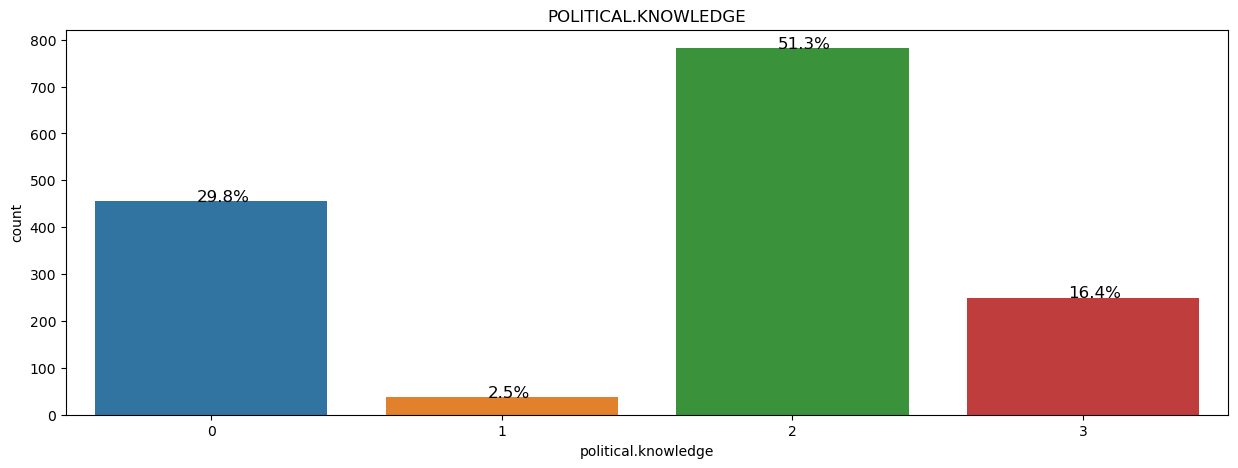

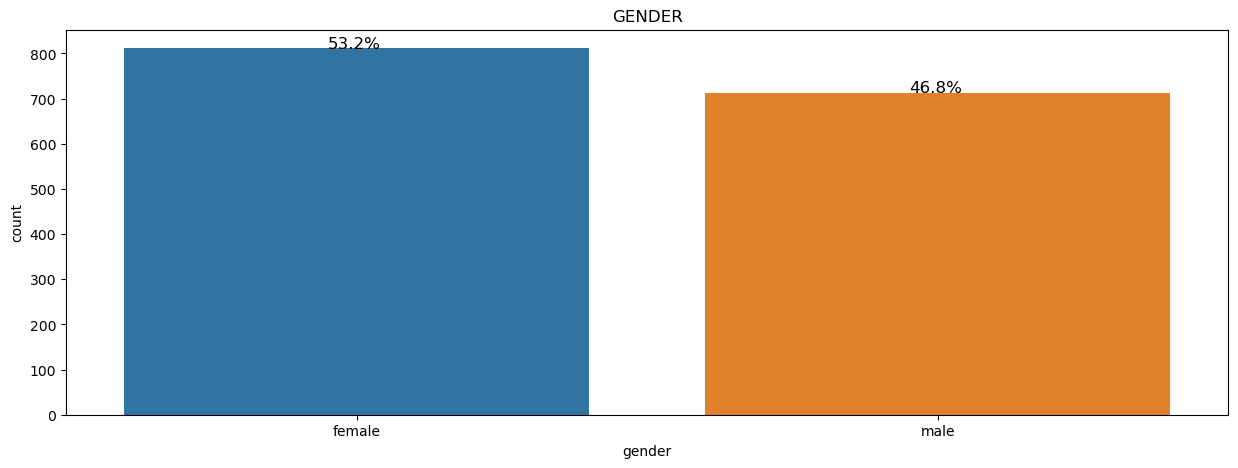

In [18]:
def count_plot(df,cat):
        total = len(df[cat])
        fig,axes = plt.subplots(figsize = (15,5))
        ax = sns.countplot(x = i,data = df)
        axes.set_title(i.upper())
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
            x = p.get_x() + p.get_width() / 2 - 0.05 
            y = p.get_y() + p.get_height()           
        
            ax.annotate(percentage, (x, y), size = 12)
for i in cat:
    count_plot(df,i)

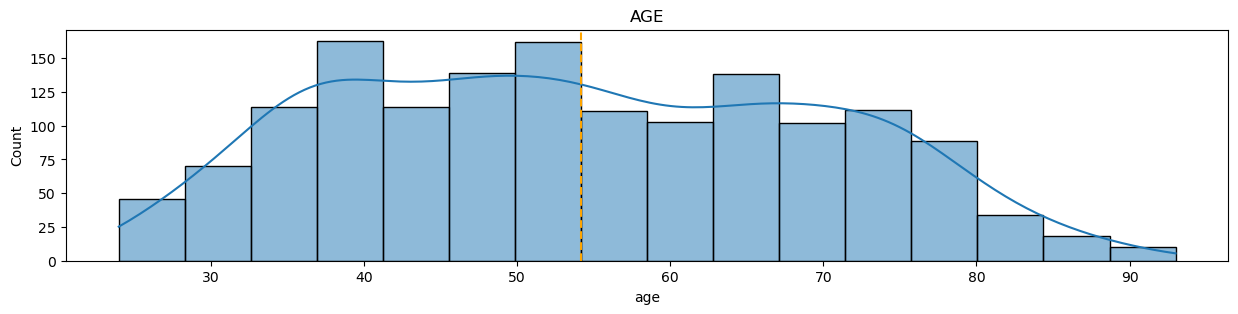

In [19]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

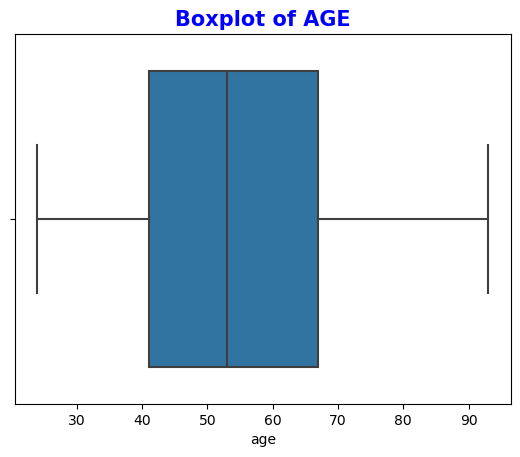

In [20]:
for i in num:
    sns.boxplot(x = df[i]).set_title(f"Boxplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")

* There is no outlier in the dataset

## Bivariate

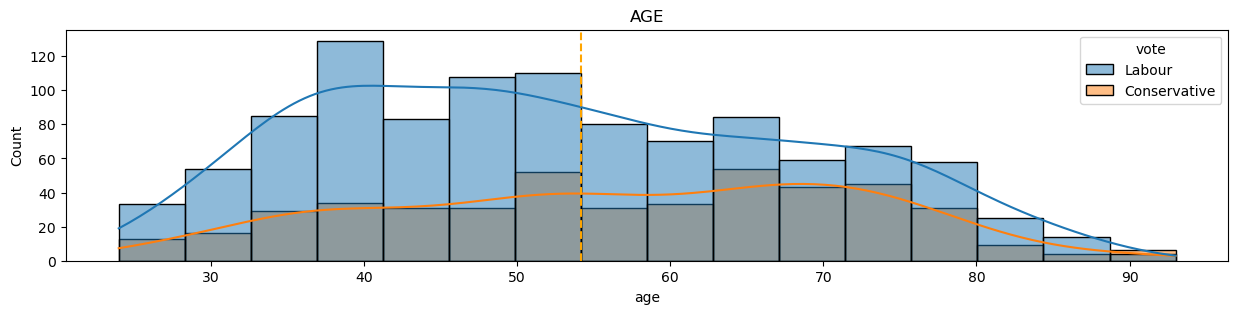

In [21]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True,hue="vote")
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

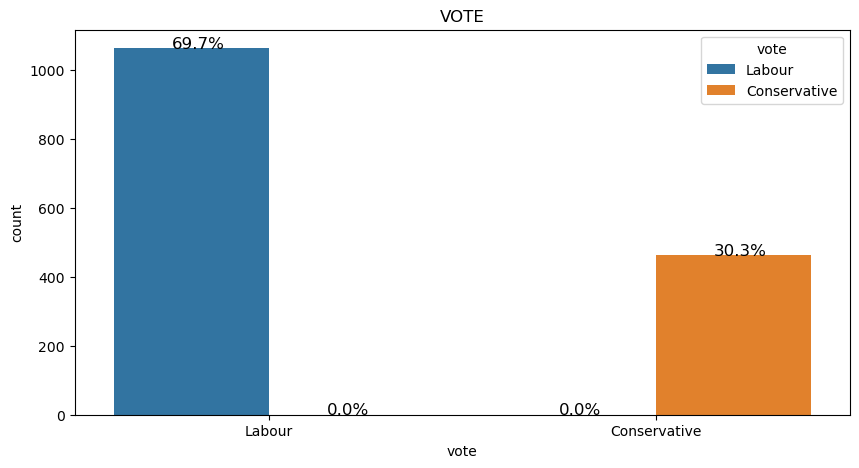

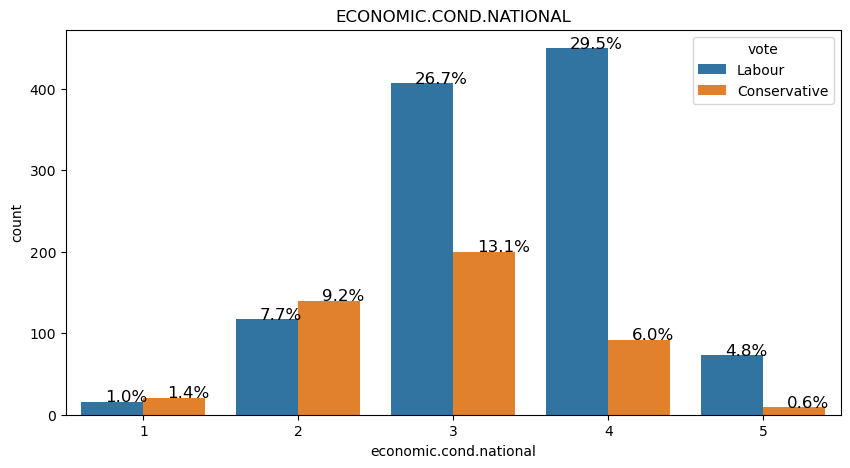

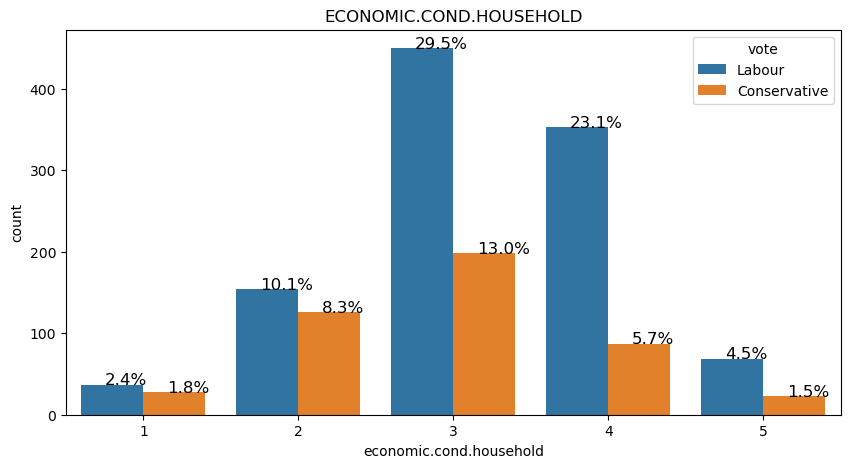

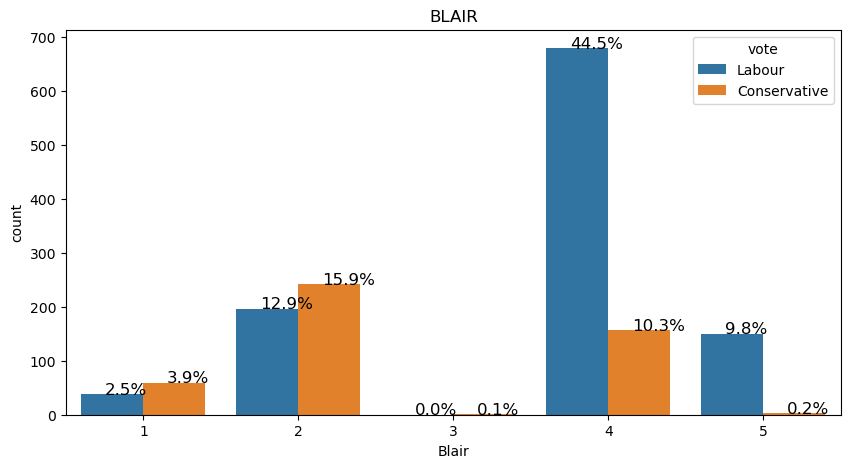

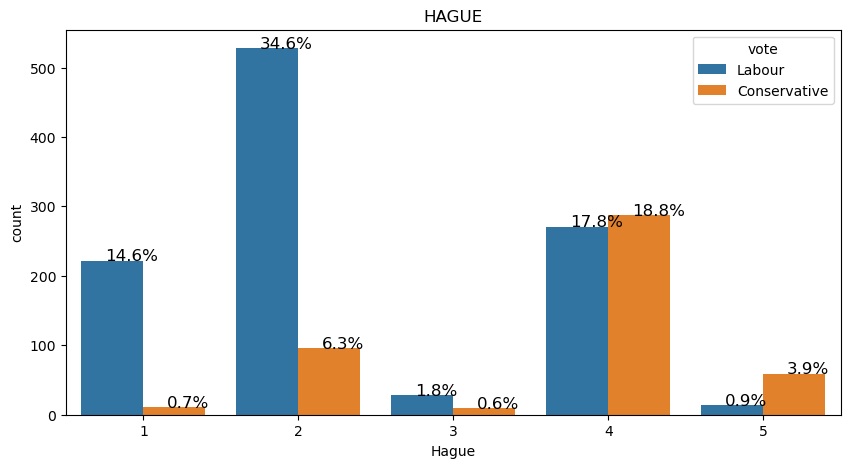

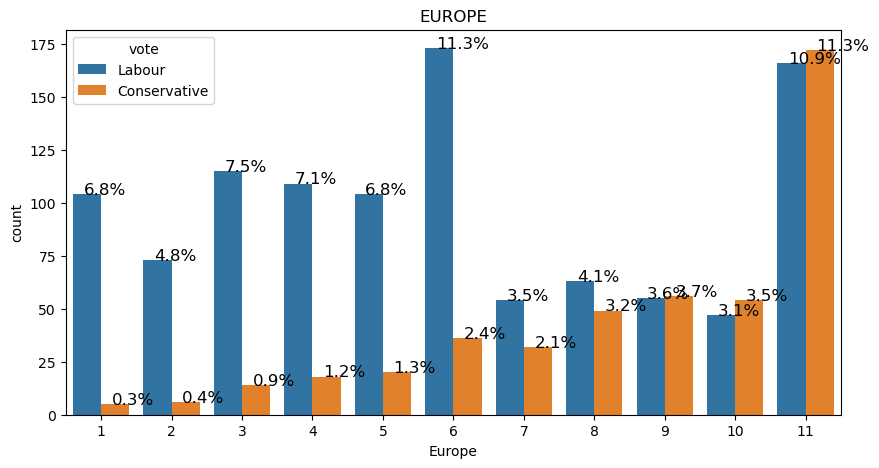

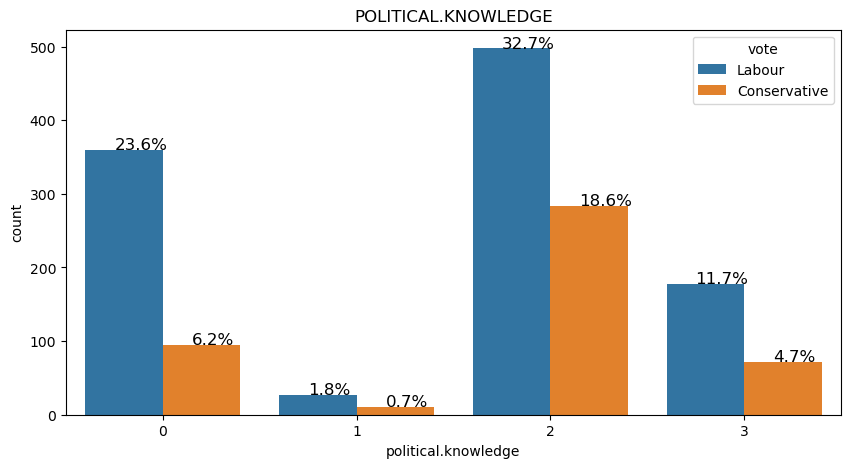

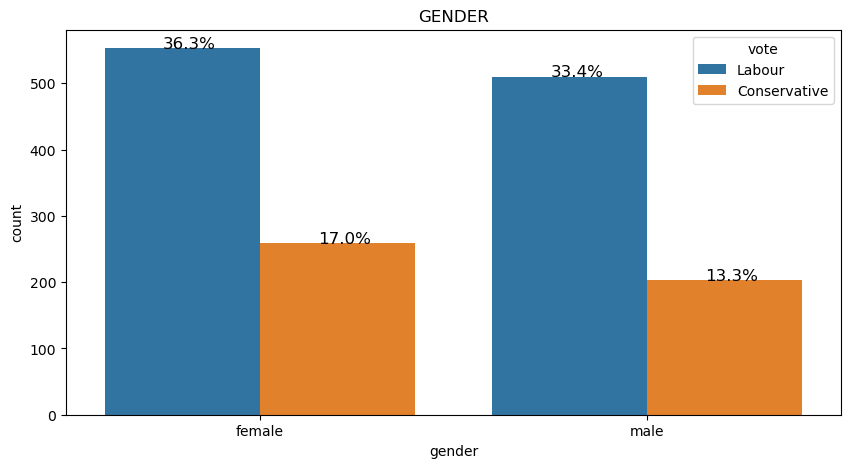

In [22]:
def count_plot(df,cat):
        total = len(df[cat])
        fig,axes = plt.subplots(figsize = (10,5))
        ax = sns.countplot(x = i,data = df,hue="vote")
        axes.set_title(i.upper())
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
            x = p.get_x() + p.get_width() / 2 - 0.05 
            y = p.get_y() + p.get_height()           
        
            ax.annotate(percentage, (x, y), size = 12)
for i in cat:
    count_plot(df,i)

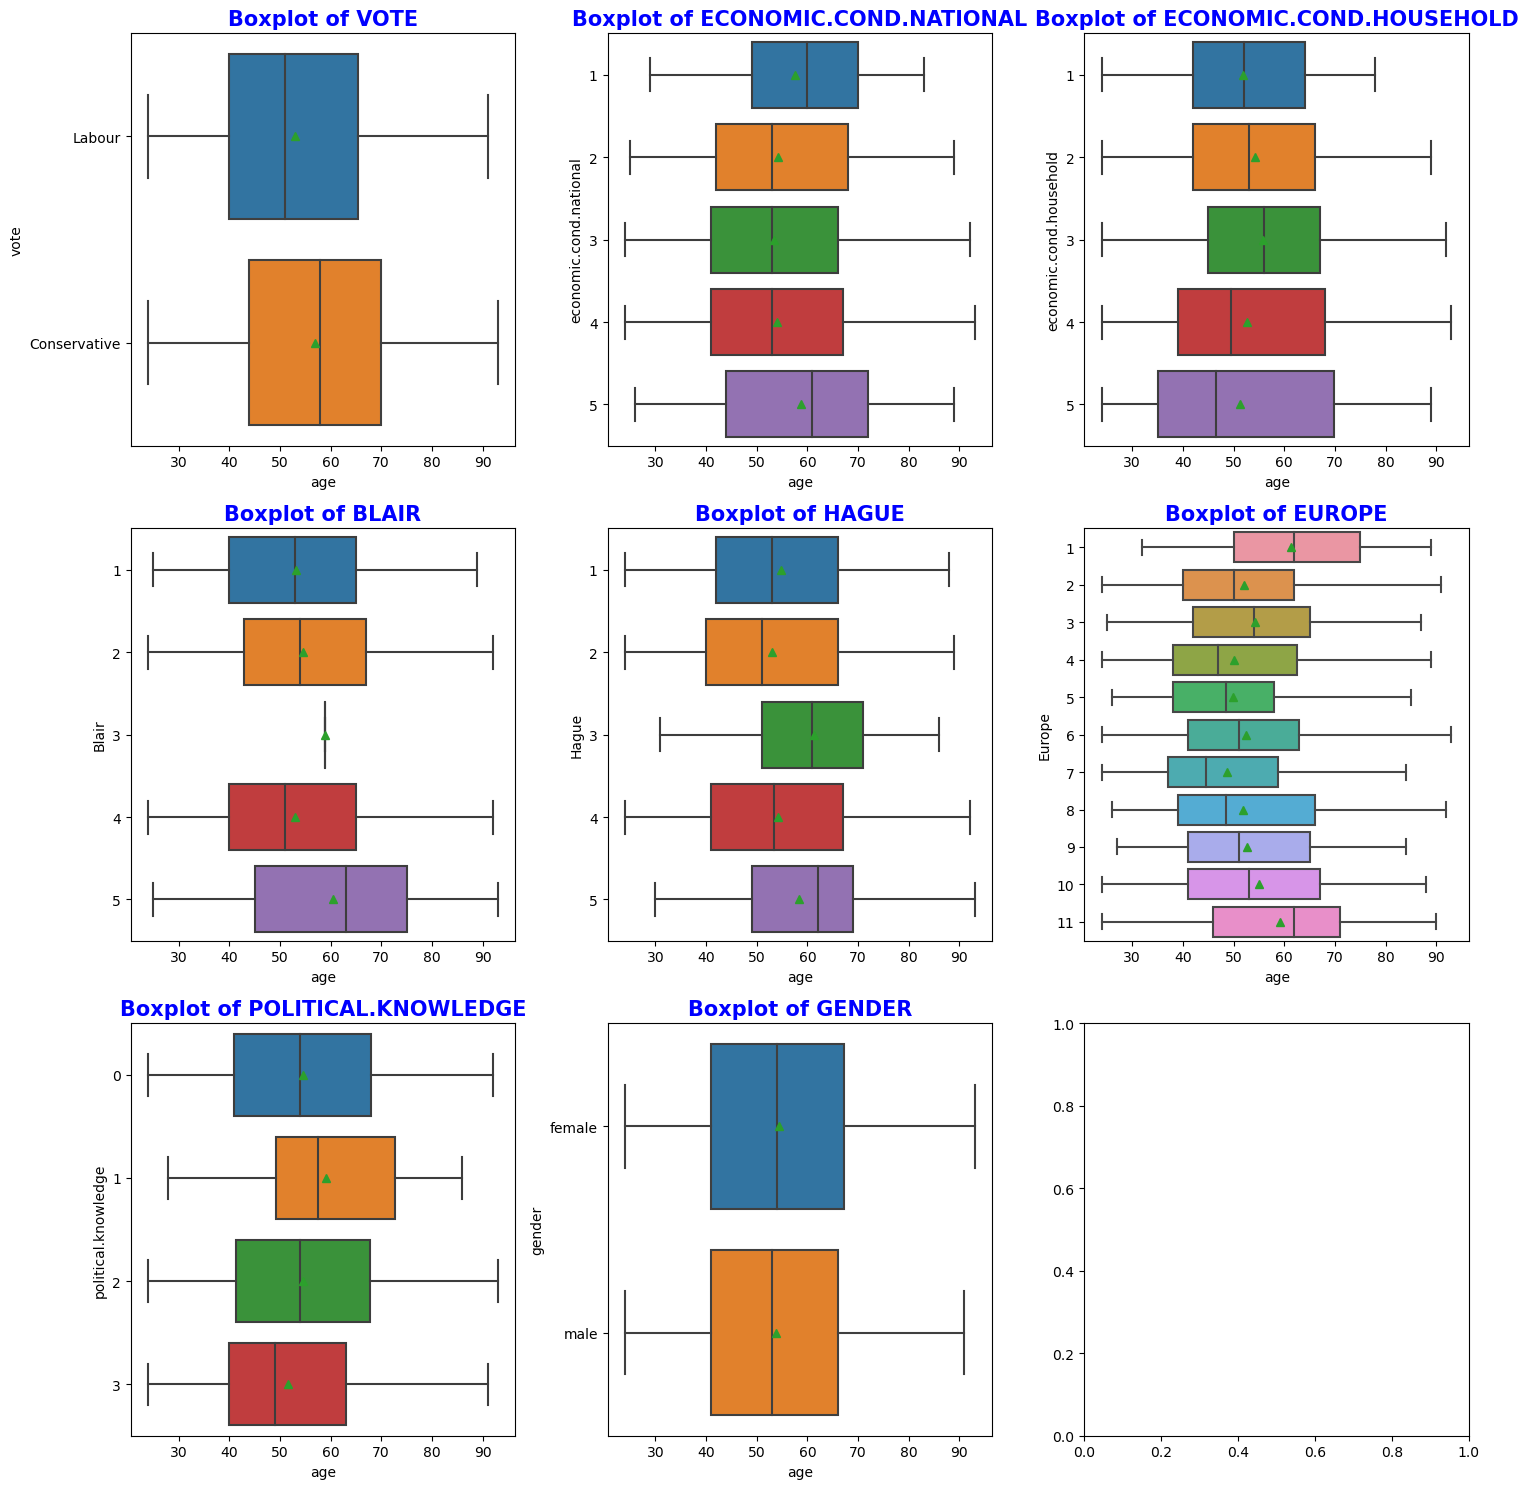

In [23]:
fig,axes = plt.subplots(3,3,figsize=(15,15))
for i,ax in zip(cat,axes.flatten()):
    sns.boxplot(data = df,x="age",y=i,ax=ax,showmeans=True)
    ax.set_title(f"Boxplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

<font color = "blue">
<font size = 5>
1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts).

In [24]:
gender = {'male':1,'female':0}
df['gender'] = df['gender'].map(gender)

vote = {'Labour':0,'Conservative':1}
df['vote'] = df['vote'].map(vote)

In [25]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [26]:
print(df["gender"].value_counts(normalize=True)*100)
print(df["vote"].value_counts(normalize=True)*100)

0    53.245902
1    46.754098
Name: gender, dtype: float64
0    69.704918
1    30.295082
Name: vote, dtype: float64


* there is no need to scale the data except for the KNN algorithms which measures the distance for algorithm calculation.
* Except age, all of the numerical variables are categorical.
* For this dataset, scaling is not that much important with these variables alone.
* During optimisation, lets try before and after scaling models to see if the model is improving due to scaling.

In [27]:
X = df.drop(['vote'],axis=1)
y = df['vote']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(1067, 8) (458, 8)


<font color = "blue">
<font size = 5>
1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both models (2 pts).

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

C:\Users\skrsk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
import sklearn.metrics as metrics
pred_train_log_model = model_log.predict(X_train)
pred_test_log_model = model_log.predict(X_test)
print('Train Accuracy: {}'.format(model_log.score(X_train,y_train)))
print('Test Accuracy: {}'.format(model_log.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_log_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_log_model))

Train Accuracy: 0.8397375820056232
Test Accuracy: 0.8231441048034934

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



<Axes: >

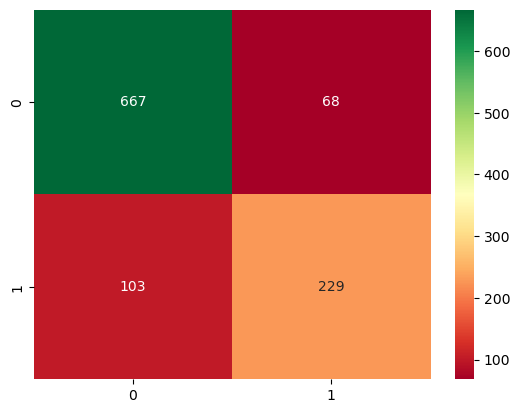

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
c_m_train = pd.DataFrame(confusion_matrix(y_train, pred_train_log_model))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

### Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
grid={'solver':['newton-cg','liblinear','lbfgs','sag','newton-cholesky', 'saga'],
      'tol':[0.0001,0.00001,0.000001,0.000001],'C':[100, 10, 1.0, 0.1, 0.01,0.001]}
model = LogisticRegression(max_iter=10000,n_jobs=-1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=4,scoring='f1',verbose=1) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=4,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'newton-cholesky', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06, 1e-06]},
             scoring='f1', verbose=1)

In [33]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 100, 'solver': 'saga', 'tol': 1e-06} 

LogisticRegression(C=100, max_iter=10000, n_jobs=-1, solver='saga', tol=1e-06)


In [34]:
model_log_best = grid_search.best_estimator_
model_log_best.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000, n_jobs=-1, solver='saga', tol=1e-06)

In [35]:
pred_train_log_model_best = model_log_best.predict(X_train)
pred_test_log_model_best = model_log_best.predict(X_test)
print('Train Accuracy: {}'.format(model_log_best.score(X_train,y_train)))
print('Test Accuracy: {}'.format(model_log_best.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_log_model_best))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_log_model_best))

Train Accuracy: 0.8406747891283973
Test Accuracy: 0.8231441048034934

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



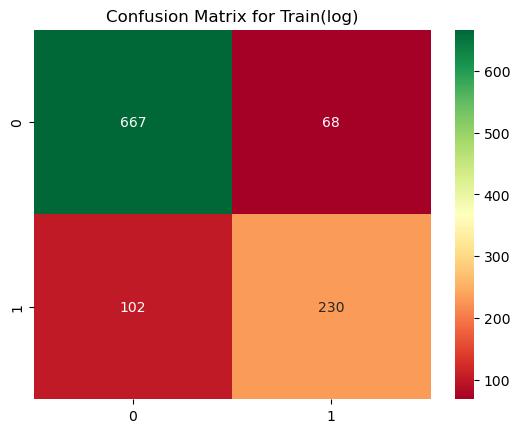

In [36]:
c_m_train_log = pd.DataFrame(confusion_matrix(y_train, pred_train_log_model_best))
sns.heatmap(c_m_train_log,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(log)")
plt.show()

In [37]:
probs_train_log = model_log_best.predict_proba(X_train)
probs_train_log = probs_train_log[:, 1]
auc_train_log = roc_auc_score(y_train,probs_train_log)
auc_train_log

0.8894291451520369

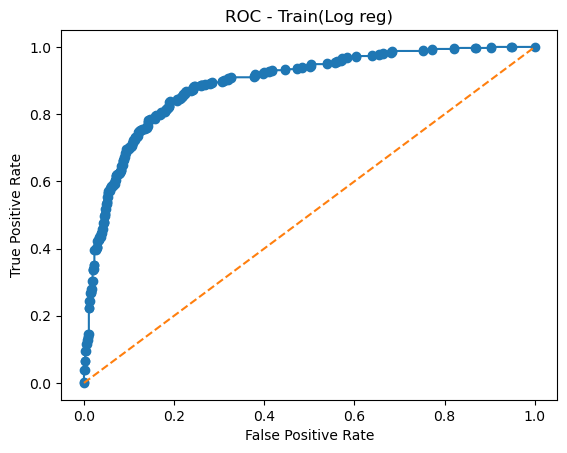

In [38]:
fpr, tpr,_=roc_curve(y_train,model_log_best.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(Log reg)')
plt.show()

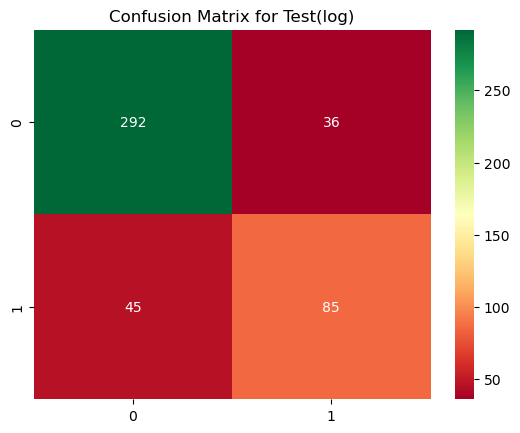

In [39]:
c_m_test_log = pd.DataFrame(confusion_matrix(y_test, pred_test_log_model_best))
sns.heatmap(c_m_test_log,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(log)")
plt.show()

In [40]:
probs_test_log = model_log_best.predict_proba(X_test)
probs_test_log = probs_test_log[:, 1]
auc_test_log = roc_auc_score(y_test,probs_test_log)
auc_test_log

0.8825046904315197

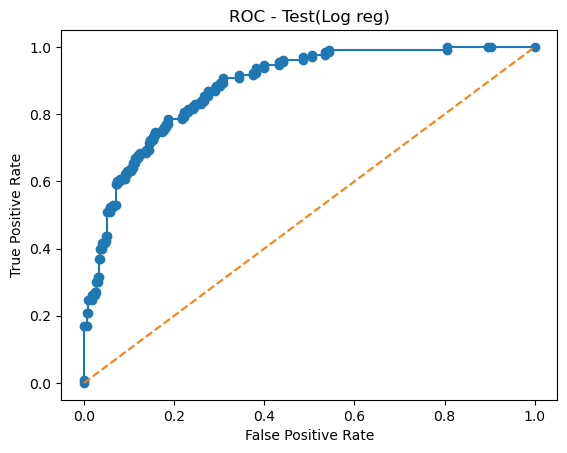

In [41]:
fpr, tpr,_=roc_curve(y_test,model_log_best.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(Log reg)')
plt.show()

## LDA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA_0 = LinearDiscriminantAnalysis()
model_LDA_0.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [43]:
pred_train_lda_0 = model_LDA_0.predict(X_train)
pred_test_lda_0 = model_LDA_0.predict(X_test)
print('Train Accuracy: {}'.format(model_LDA_0.score(X_train,y_train)))
print('Test Accuracy: {}'.format(model_LDA_0.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_lda_0))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_lda_0))

Train Accuracy: 0.8369259606373008
Test Accuracy: 0.8187772925764192

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



### Tuning

In [44]:
model_LDA= LinearDiscriminantAnalysis()
params_LDA = {'solver':['svd','lsqr','eigen']}
grid_search_LDA = GridSearchCV(estimator = model_LDA, param_grid = params_LDA, cv = 5,n_jobs=-1,scoring='precision',verbose=1)
grid_search_LDA.fit(X_train, y_train)
LDA_model = grid_search_LDA.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [45]:
pred_train_lda_model = LDA_model.predict(X_train)
pred_test_lda_model = LDA_model.predict(X_test)
print('Train Accuracy: {}'.format(LDA_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LDA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_lda_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_lda_model))

Train Accuracy: 0.8369259606373008
Test Accuracy: 0.8187772925764192

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



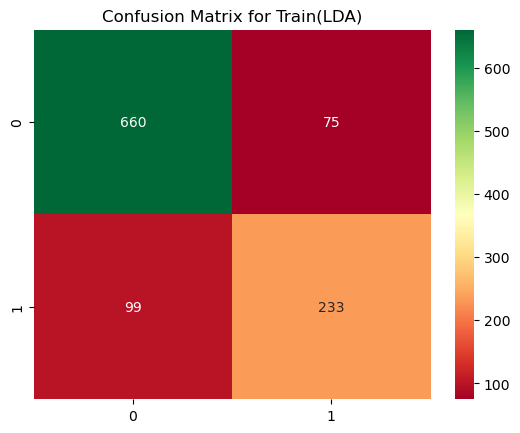

In [46]:
c_m_train_lda = pd.DataFrame(confusion_matrix(y_train, pred_train_lda_model))
sns.heatmap(c_m_train_lda,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(LDA)")
plt.show()

In [47]:
probs_train_lda = LDA_model.predict_proba(X_train)
probs_train_lda = probs_train_lda[:, 1]
auc_train_lda = roc_auc_score(y_train,probs_train_lda)
auc_train_lda

0.8892242439144333

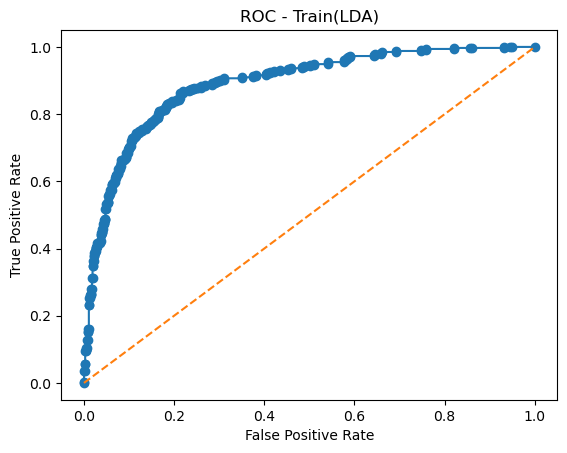

In [48]:
fpr, tpr,_=roc_curve(y_train,LDA_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(LDA)')
plt.show()

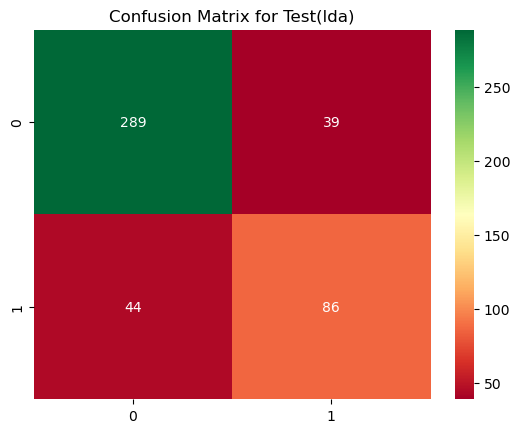

In [49]:
c_m_test_lda = pd.DataFrame(confusion_matrix(y_test, pred_test_lda_model))
sns.heatmap(c_m_test_lda,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(lda)")
plt.show()

In [50]:
probs_test_lda = LDA_model.predict_proba(X_test)
probs_test_lda = probs_test_lda[:, 1]
auc_test_lda = roc_auc_score(y_test,probs_test_lda)
auc_test_lda

0.8837711069418387

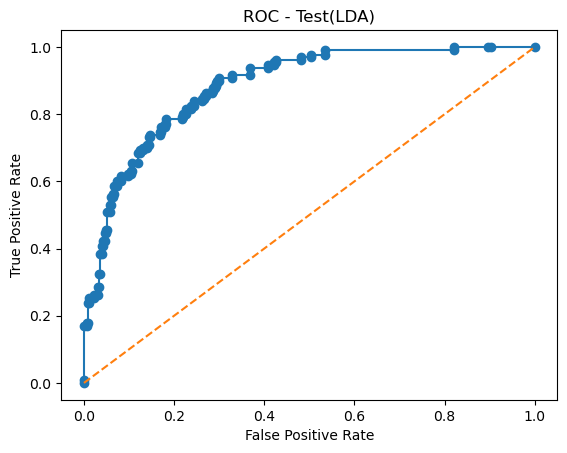

In [51]:
fpr, tpr,_=roc_curve(y_test,LDA_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(LDA)')
plt.show()

<font color = "blue">
<font size = 5>
1.5)Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts).

## KNN

In [52]:
from sklearn.preprocessing import StandardScaler
X_train_sca = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns)
X_train_sca

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.470877,-0.295510,-0.156914,-1.153072,-0.623273,1.307819,0.411756,-0.953292
1,-0.352045,-0.295510,-0.156914,-1.153072,-0.623273,0.399525,-1.465782,-0.953292
2,1.230498,0.822609,0.923261,0.550983,1.008709,0.096760,-1.465782,1.048997
3,0.154368,-1.413630,-0.156914,0.550983,-0.623273,-0.206005,0.411756,-0.953292
4,-1.934589,0.822609,2.003437,0.550983,1.008709,-0.206005,-1.465782,1.048997
...,...,...,...,...,...,...,...,...
1062,0.787386,0.822609,-0.156914,1.403011,-0.623273,-1.417064,0.411756,1.048997
1063,-1.744684,1.940728,2.003437,-1.153072,-1.439264,-0.811534,1.350525,1.048997
1064,-1.301571,0.822609,2.003437,0.550983,1.008709,0.096760,0.411756,-0.953292
1065,-1.174968,0.822609,0.923261,0.550983,-0.623273,0.096760,0.411756,-0.953292


In [53]:
X_train_sca.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1067.0,1.664814e-17,1.000469,-1.934589,-0.858459,-0.035537,0.850687,2.433231
economic.cond.national,1067.0,4.827961e-17,1.000469,-2.531749,-0.295510,-0.295510,0.822609,1.940728
economic.cond.household,1067.0,2.297444e-16,1.000469,-2.317265,-0.156914,-0.156914,0.923261,2.003437
Blair,1067.0,-8.657034e-17,1.000469,-2.005100,-1.153072,0.550983,0.550983,1.403011
Hague,1067.0,1.465037e-16,1.000469,-1.439264,-0.623273,-0.623273,1.008709,1.824700
Europe,1067.0,-6.492776e-17,1.000469,-1.719829,-0.811534,-0.206005,1.005054,1.307819
political.knowledge,1067.0,-5.327406e-17,1.000469,-1.465782,-1.465782,0.411756,0.411756,1.350525
gender,1067.0,-9.406201e-17,1.000469,-0.953292,-0.953292,-0.953292,1.048997,1.048997


In [54]:
X_test_sca = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns)
X_test_sca

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.278166,-2.602825,-2.268319,-1.098162,1.041976,0.353615,1.338927,-0.900154
1,-1.248710,-0.239904,-0.137262,-1.098162,1.041976,0.658616,0.447606,1.110921
2,-0.148760,-1.421364,-1.202791,0.603896,1.041976,-0.866390,0.447606,1.110921
3,-1.507522,-1.421364,-0.137262,0.603896,1.041976,0.048614,1.338927,1.110921
4,-0.731087,-0.239904,-0.137262,-1.098162,-0.570271,0.658616,-1.335035,1.110921
...,...,...,...,...,...,...,...,...
453,-0.472275,-0.239904,0.928266,1.454925,-0.570271,-1.171392,0.447606,-0.900154
454,-0.536978,0.941557,0.928266,0.603896,-0.570271,1.268619,1.338927,1.110921
455,0.045349,-0.239904,-1.202791,-1.098162,1.848099,0.658616,1.338927,1.110921
456,-0.407572,0.941557,0.928266,0.603896,-1.376394,-0.866390,1.338927,1.110921


In [55]:
X_test_sca.describe().T

,count,mean,std,min,25%,50%,75%,max
age,458.0,-6.011688e-17,1.001093,-1.895740,-0.795790,-0.084057,0.757081,2.504060
economic.cond.national,458.0,-2.404675e-16,1.001093,-2.602825,-0.239904,-0.239904,0.941557,2.123018
economic.cond.household,458.0,-1.241123e-16,1.001093,-2.268319,-0.137262,-0.137262,0.928266,1.993794
Blair,458.0,4.460285e-17,1.001093,-1.949191,-1.098162,0.603896,0.603896,1.454925
Hague,458.0,-1.027805e-16,1.001093,-1.376394,-0.570271,-0.570271,1.041976,1.848099
Europe,458.0,-6.205613e-17,1.001093,-1.781394,-0.866390,0.048614,0.963618,1.268619
political.knowledge,458.0,-1.890773e-17,1.001093,-1.335035,-1.335035,0.447606,0.447606,1.338927
gender,458.0,3.878508e-17,1.001093,-0.900154,-0.900154,-0.900154,1.110921,1.110921


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN_0 = KNeighborsClassifier()
model_KNN_0.fit(X_train_sca,y_train)

KNeighborsClassifier()

In [57]:
pred_train_KNN_0 = model_KNN_0.predict(X_train_sca)
pred_test_KNN_0 = model_KNN_0.predict(X_test_sca)
print('Train Accuracy: {}'.format(model_KNN_0.score(X_train_sca,y_train)))
print('Test Accuracy: {}'.format(model_KNN_0.score(X_test_sca,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNN_0))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNN_0))

Train Accuracy: 0.8631677600749765
Test Accuracy: 0.8275109170305677

Classification Report Train
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       735
           1       0.80      0.75      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



### Tuning

In [58]:
from sklearn.pipeline import Pipeline
model_KNN = KNeighborsClassifier()
std_scaler = StandardScaler()
pipeline_KNN = Pipeline(steps = [('std_scaler',std_scaler),
                            ('model_KNN',model_KNN)])
params_KNN = {'model_KNN__n_neighbors':list(range(1,50,1)),
         'model_KNN__weights':['uniform','distance'],
         'model_KNN__metric':['euclidean','chebyshev','manhattan']}
grid_search_KNN = GridSearchCV(pipeline_KNN,param_grid = params_KNN,scoring = 'f1',cv=5,n_jobs=-1)
grid_search_KNN.fit(X_train,y_train)
KNN_model = grid_search_KNN.best_estimator_

In [59]:
grid_search_KNN.best_params_

{'model_KNN__metric': 'euclidean',
 'model_KNN__n_neighbors': 15,
 'model_KNN__weights': 'uniform'}

In [60]:
pred_train_KNN_model = KNN_model.predict(X_train)
pred_test_KNN_model = KNN_model.predict(X_test)
print('Train Accuracy: {}'.format(KNN_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(KNN_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNN_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNN_model))

Train Accuracy: 0.8416119962511716
Test Accuracy: 0.8209606986899564

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       328
           1       0.69      0.68      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



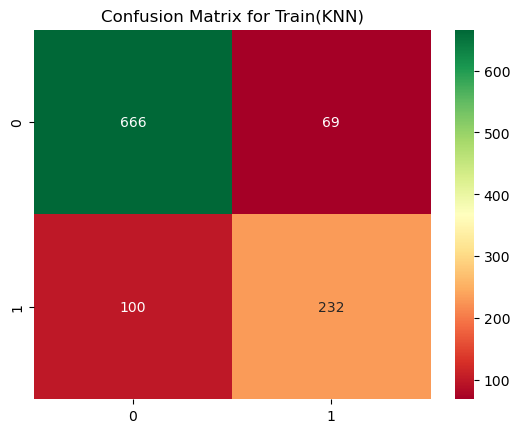

In [61]:
c_m_train_KNN = pd.DataFrame(confusion_matrix(y_train, pred_train_KNN_model))
sns.heatmap(c_m_train_KNN,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(KNN)")
plt.show()

In [62]:
probs_train_KNN = KNN_model.predict_proba(X_train)
probs_train_KNN = probs_train_KNN[:, 1]
auc_train_KNN = roc_auc_score(y_train,probs_train_KNN)
auc_train_KNN

0.9050446684697976

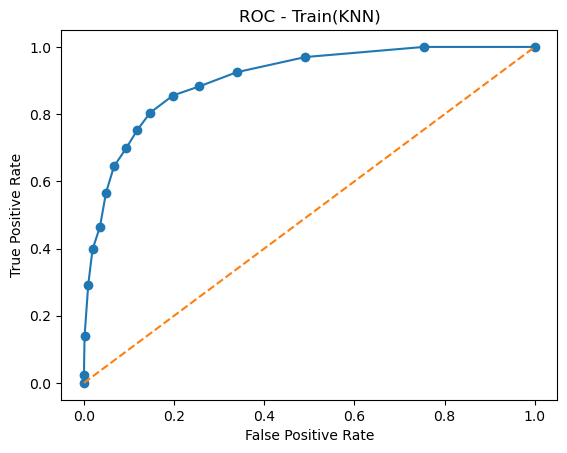

In [63]:
fpr, tpr,_=roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(KNN)')
plt.show()

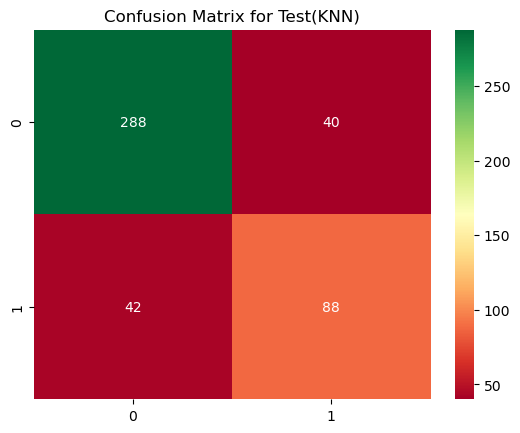

In [64]:
c_m_test_KNN = pd.DataFrame(confusion_matrix(y_test, pred_test_KNN_model))
sns.heatmap(c_m_test_KNN,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(KNN)")
plt.show()

In [65]:
probs_test_KNN = KNN_model.predict_proba(X_test)
probs_test_KNN = probs_test_KNN[:, 1]
auc_test_KNN = roc_auc_score(y_test,probs_test_KNN)
auc_test_KNN

0.8881683864915573

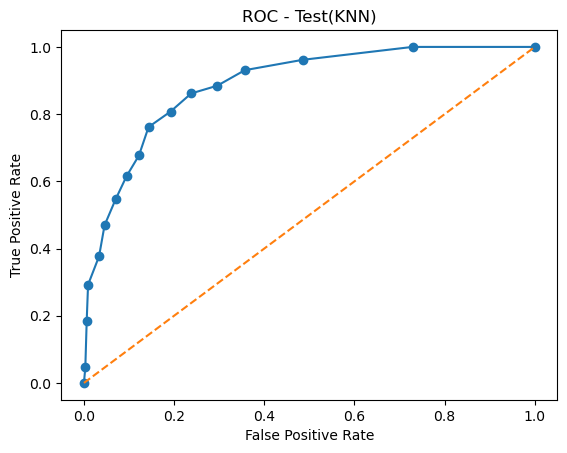

In [66]:
fpr, tpr,_=roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(KNN)')
plt.show()

## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB() 
NB_model.fit(X_train,y_train)

GaussianNB()

In [68]:
pred_train_NB_model = NB_model.predict(X_train)
pred_test_NB_model = NB_model.predict(X_test)
print('Train Accuracy: {}'.format(NB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(NB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_NB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_NB_model))

Train Accuracy: 0.8331771321462043
Test Accuracy: 0.8253275109170306

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



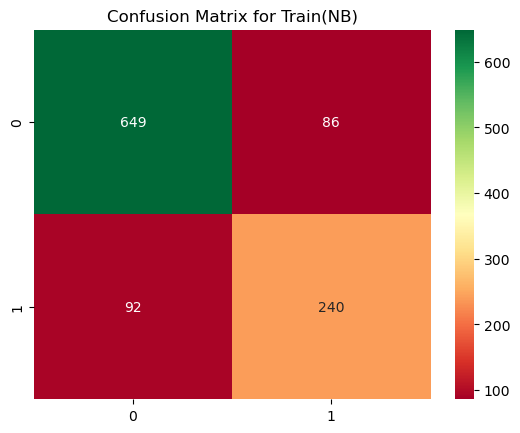

In [69]:
c_m_train_NB = pd.DataFrame(confusion_matrix(y_train, pred_train_NB_model))
sns.heatmap(c_m_train_NB,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(NB)")
plt.show()

In [70]:
probs_train_NB = NB_model.predict_proba(X_train)
probs_train_NB = probs_train_NB[:, 1]
auc_train_NB = roc_auc_score(y_train,probs_train_NB)
auc_train_NB

0.8864703712810424

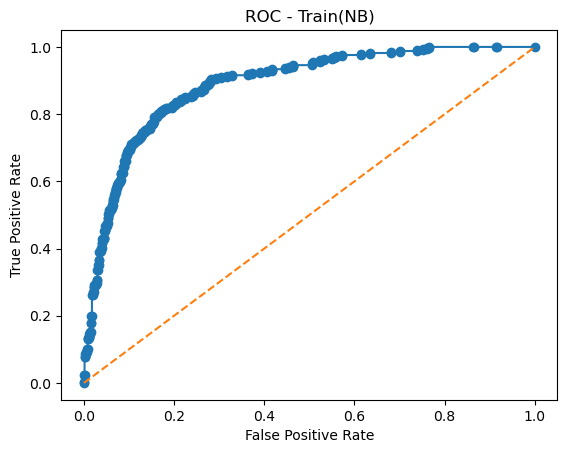

In [71]:
fpr, tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(NB)')
plt.show()

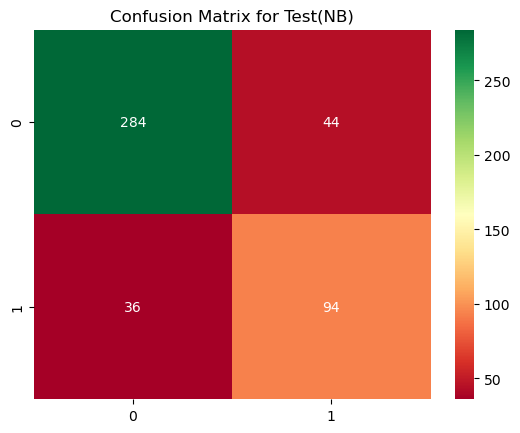

In [72]:
c_m_test_NB = pd.DataFrame(confusion_matrix(y_test, pred_test_NB_model))
sns.heatmap(c_m_test_NB,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(NB)")
plt.show()

In [73]:
probs_test_NB = NB_model.predict_proba(X_test)
probs_test_NB = probs_test_NB[:, 1]
auc_test_NB = roc_auc_score(y_test,probs_test_NB)
auc_test_NB

0.8845450281425891

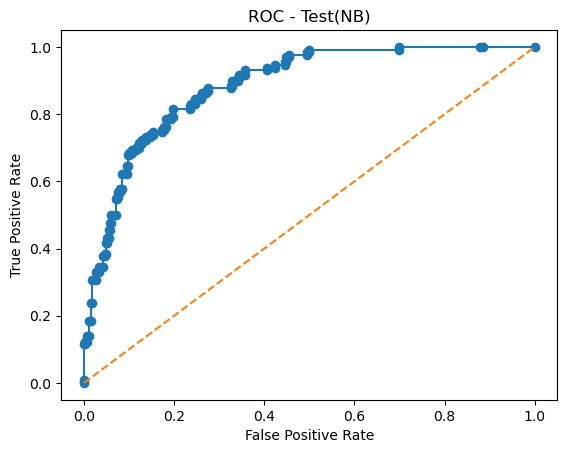

In [74]:
fpr, tpr,_=roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(NB)')
plt.show()

<font color = "blue">
<font size = 5>
1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). 

## Bagging

## Random Forest

In [75]:
np.random.seed(1)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
params_RF = {'criterion':['gini','entropy'],
         'n_estimators':list(range(100,1000,2)),
         'min_samples_leaf':list(range(1,10)),
         'max_features':list(range(1,15)),
         'max_samples':list(np.arange(0.1,1))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 10,n_jobs=-1,scoring='f1',verbose=1)
grid_search_RF.fit(X_train,y_train)
RF_model = grid_search_RF.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
grid_search_RF.best_params_

{'n_estimators': 680,
 'min_samples_leaf': 3,
 'max_samples': 0.1,
 'max_features': 6,
 'criterion': 'gini'}

In [77]:
pred_train_RF_model = RF_model.predict(X_train)
pred_test_RF_model = RF_model.predict(X_test)
print('Train Accuracy: {}'.format(RF_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(RF_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_RF_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_RF_model))

Train Accuracy: 0.8481724461105904
Test Accuracy: 0.8253275109170306

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       735
           1       0.81      0.67      0.73       332

    accuracy                           0.85      1067
   macro avg       0.83      0.80      0.81      1067
weighted avg       0.85      0.85      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.71      0.65      0.68       130

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



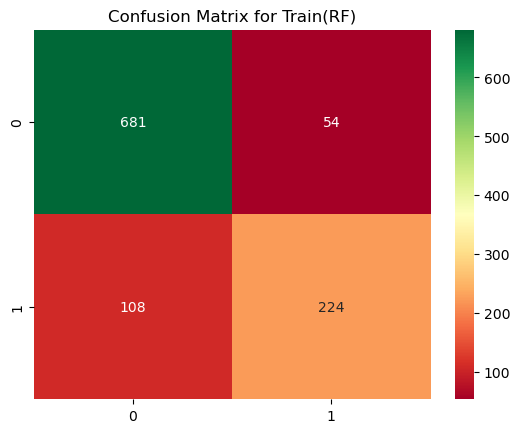

In [78]:
c_m_train_RF = pd.DataFrame(confusion_matrix(y_train, pred_train_RF_model))
sns.heatmap(c_m_train_RF,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(RF)")
plt.show()

In [79]:
probs_train_RF = RF_model.predict_proba(X_train)
probs_train_RF = probs_train_RF[:, 1]
auc_train_RF = roc_auc_score(y_train,probs_train_RF)
auc_train_RF

0.9122920252438325

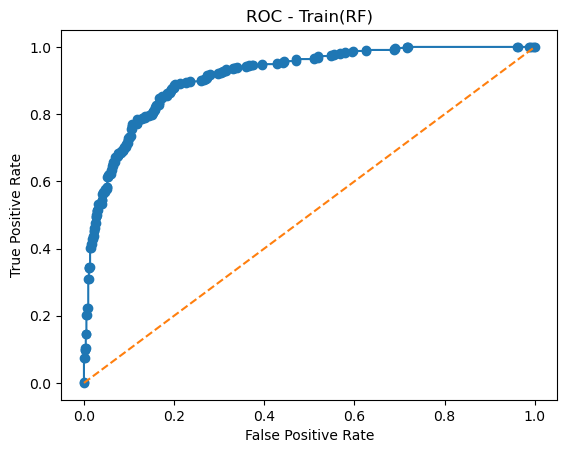

In [80]:
fpr, tpr,_=roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(RF)')
plt.show()

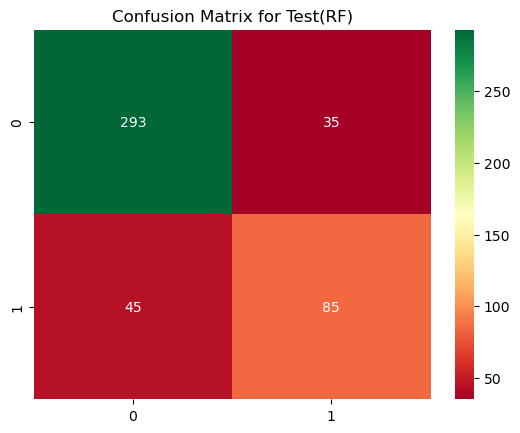

In [81]:
c_m_test_RF = pd.DataFrame(confusion_matrix(y_test, pred_test_RF_model))
sns.heatmap(c_m_test_RF,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(RF)")
plt.show()

In [82]:
probs_test_RF = RF_model.predict_proba(X_test)
probs_test_RF = probs_test_RF[:, 1]
auc_test_RF = roc_auc_score(y_test,pred_test_RF_model)
auc_test_RF

0.7735694183864915

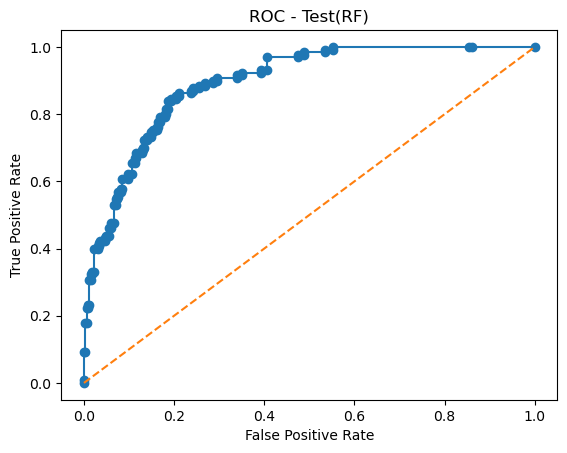

In [83]:
fpr, tpr,_=roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(RF)')
plt.show()

In [84]:
print (pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.245114
Europe                   0.229691
Blair                    0.153047
age                      0.144254
political.knowledge      0.097370
economic.cond.national   0.061942
economic.cond.household  0.048343
gender                   0.020239


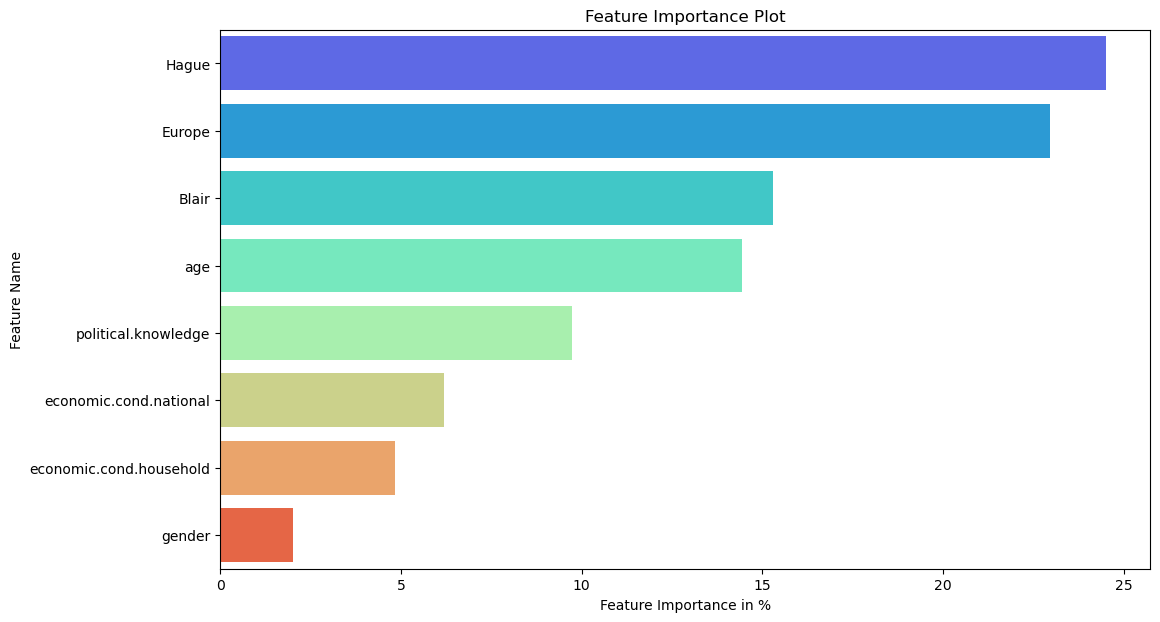

In [85]:
x=pd.DataFrame(RF_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

## LDA Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
model_LDAB = BaggingClassifier(base_estimator = LDA_model)
params_LDAB = {'n_estimators':list(range(100,1000,2)),
              'max_samples':list(np.arange(0.01,1,0.01)),
              'max_features':list(np.arange(0.01,1,0.01))}
grid_search_LDAB = RandomizedSearchCV(estimator = model_LDAB, param_distributions = params_LDAB, cv = 5,n_jobs=-1,scoring='f1',verbose=1)
grid_search_LDAB.fit(X_train,y_train)
LDAB_model = grid_search_LDAB.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\skrsk\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [87]:
grid_search_LDAB.best_params_

{'n_estimators': 900, 'max_samples': 0.9, 'max_features': 0.91}

In [88]:
pred_train_LDAB_model = LDAB_model.predict(X_train)
pred_test_LDAB_model = LDAB_model.predict(X_test)
print('Train Accuracy: {}'.format(LDAB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LDAB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_LDAB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_LDAB_model))

Train Accuracy: 0.8388003748828491
Test Accuracy: 0.8253275109170306

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.71      0.65      0.68       130

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



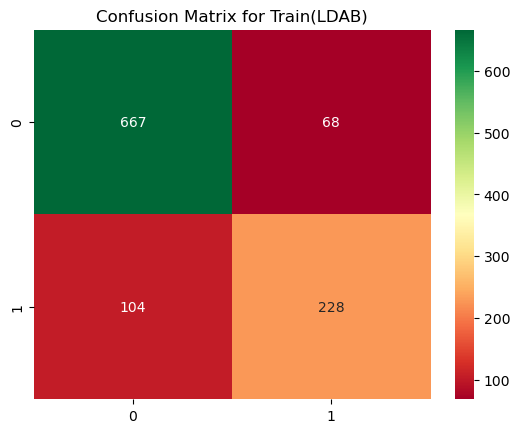

In [89]:
c_m_train_LDAB = pd.DataFrame(confusion_matrix(y_train, pred_train_LDAB_model))
sns.heatmap(c_m_train_LDAB,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(LDAB)")
plt.show()

In [90]:
probs_train_LDAB = LDAB_model.predict_proba(X_train)
probs_train_LDAB = probs_train_LDAB[:, 1]
auc_train_LDAB = roc_auc_score(y_train,probs_train_LDAB)
auc_train_LDAB

0.8892980083599705

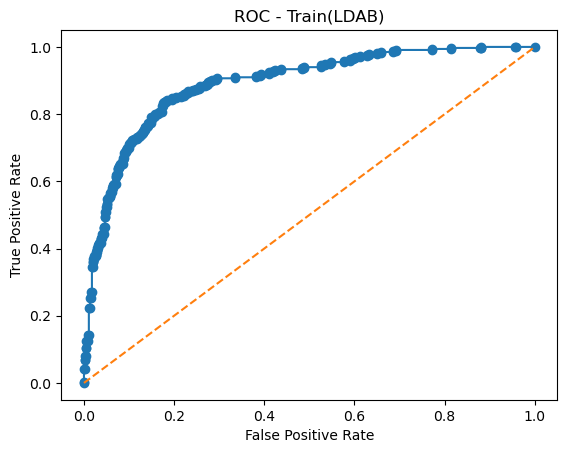

In [91]:
fpr, tpr,_=roc_curve(y_train,LDAB_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(LDAB)')
plt.show()

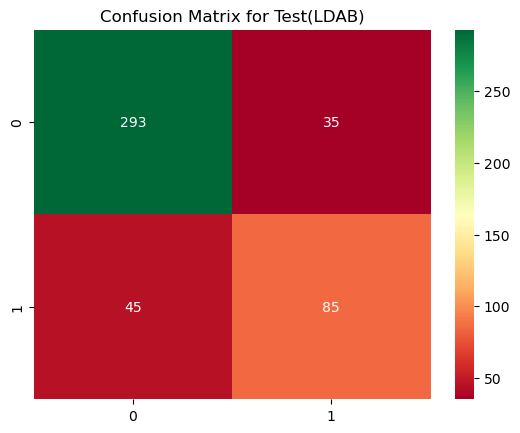

In [92]:
c_m_test_LDAB = pd.DataFrame(confusion_matrix(y_test, pred_test_LDAB_model))
sns.heatmap(c_m_test_LDAB,annot = True,fmt = '.5g',cmap = 'RdYlGn',).set_title("Confusion Matrix for Test(LDAB)")
plt.show()

In [93]:
probs_test_LDAB = LDAB_model.predict_proba(X_test)
probs_test_LDAB = probs_test_LDAB[:, 1]
auc_test_LDAB = roc_auc_score(y_test,probs_test_LDAB)
auc_test_LDAB

0.886608818011257

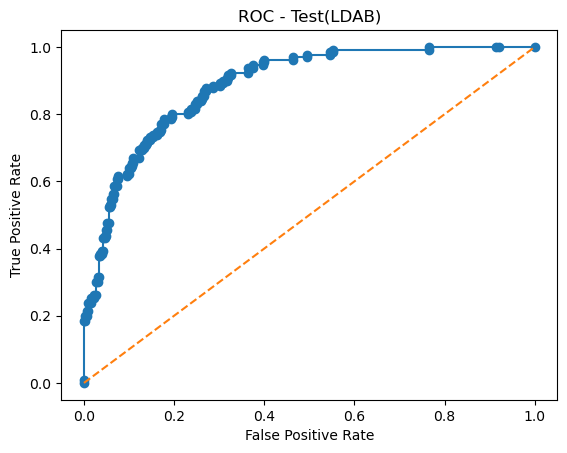

In [94]:
fpr, tpr,_=roc_curve(y_test,LDAB_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(LDAB)')
plt.show()

## Boosting

### XG Boost

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
model_XGB = GradientBoostingClassifier(max_depth = 5)
params_XGB = {'learning_rate':list(np.arange(0.01,0.02,0.0000005)),'tol':[0.0001,0.00001,0.000001,0.000001],
             'n_estimators':list(np.arange(100,500,1))}
grid_search_XGB = RandomizedSearchCV(estimator = model_XGB, param_distributions = params_XGB, cv = 5,n_jobs=-1,scoring='f1',verbose=1,random_state=1)
grid_search_XGB.fit(X_train,y_train)
XGB_model=grid_search_XGB.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [96]:
grid_search_XGB.best_params_

{'tol': 1e-05, 'n_estimators': 237, 'learning_rate': 0.013972000000003973}

In [97]:
pred_train_XGB_model = XGB_model.predict(X_train)
pred_test_XGB_model = XGB_model.predict(X_test)
print('Train Accuracy: {}'.format(XGB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(XGB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_XGB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_XGB_model))

Train Accuracy: 0.915651358950328
Test Accuracy: 0.8144104803493449

Classification Report Train
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       735
           1       0.89      0.83      0.86       332

    accuracy                           0.92      1067
   macro avg       0.91      0.89      0.90      1067
weighted avg       0.91      0.92      0.91      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       328
           1       0.67      0.69      0.68       130

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.81      0.82       458



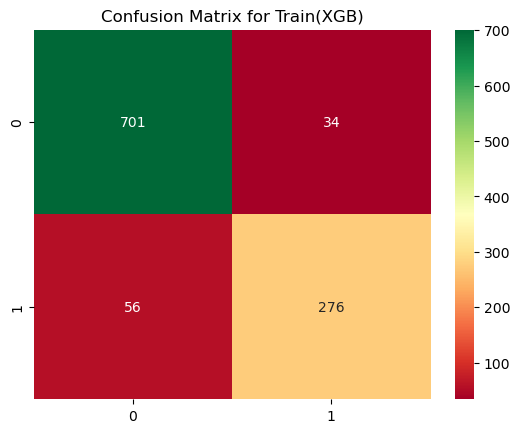

In [98]:
c_m_train_XGB = pd.DataFrame(confusion_matrix(y_train, pred_train_XGB_model))
sns.heatmap(c_m_train_XGB,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(XGB)")
plt.show()

In [99]:
probs_train_XGB = XGB_model.predict_proba(X_train)
probs_train_XGB = probs_train_XGB[:, 1]
auc_train_XGB = roc_auc_score(y_train,probs_train_XGB)
auc_train_XGB

0.9662527661667076

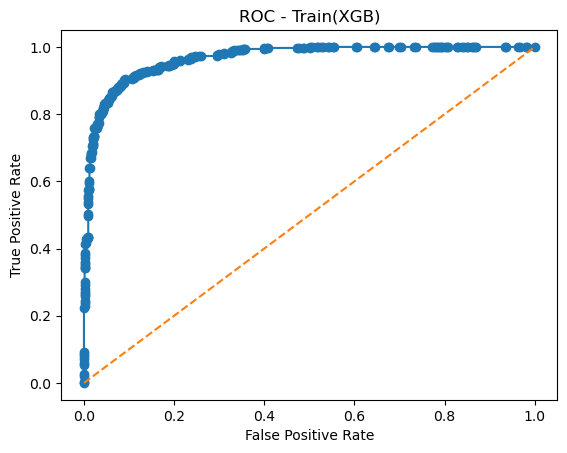

In [100]:
fpr, tpr,_=roc_curve(y_train,XGB_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(XGB)')
plt.show()

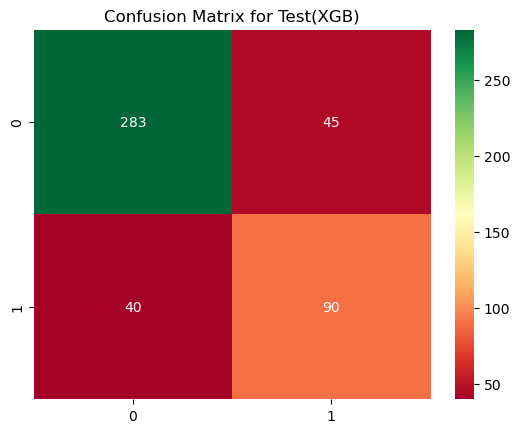

In [101]:
c_m_test_XGB = pd.DataFrame(confusion_matrix(y_test, pred_test_XGB_model))
sns.heatmap(c_m_test_XGB,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(XGB)")
plt.show()

In [102]:
probs_test_XGB = XGB_model.predict_proba(X_test)
probs_test_XGB = probs_test_XGB[:, 1]
auc_test_XGB = roc_auc_score(y_test,probs_test_XGB)
auc_test_XGB

0.889188555347092

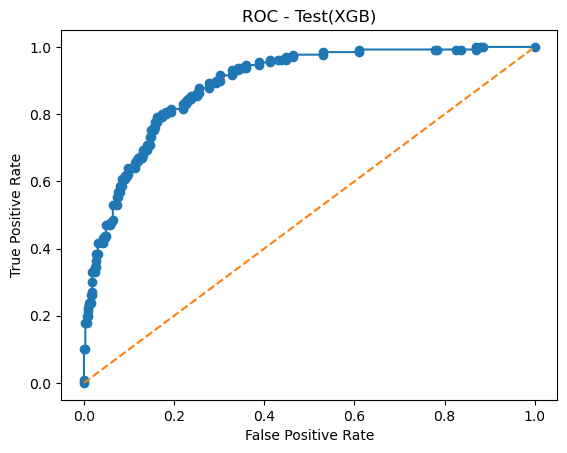

In [103]:
fpr, tpr,_=roc_curve(y_test,XGB_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(XGB)')
plt.show()

<font color = "blue">
<font size = 5>
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts). Comment on the final model.(3 pts).

In [104]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['NB','Log','LDA','KNN','LDAB','XGB','RF']
acc=[]
pre_L=[]
rec_L=[]
f1_L=[]
pre_C=[]
rec_C=[]
f1_C=[]
test_pred = [pred_test_NB_model,pred_test_log_model_best,pred_test_lda_model,pred_test_KNN_model,pred_test_LDAB_model,
             pred_test_XGB_model,pred_test_RF_model]
for i in test_pred:
    acc.append(round(accuracy_score(y_test,i)*100,2))
    pre_L.append(round(precision_score(y_test,i,zero_division=0,pos_label=0)*100,2))
    rec_L.append(round(recall_score(y_test,i,pos_label=0)*100,2))
    f1_L.append(round(f1_score(y_test,i,pos_label=0)*100,2))
    pre_C.append(round(precision_score(y_test,i,zero_division=0,pos_label=1)*100,2))
    rec_C.append(round(recall_score(y_test,i,pos_label=1)*100,2))
    f1_C.append(round(f1_score(y_test,i,pos_label=1)*100,2))
metric_df_test = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision-Labour':pre_L,'Recall-Labour':rec_L,'F1_Score-Labour':f1_L,'Precision-Conservative':pre_C,'Recall-Conservative':rec_C,'F1_Score-Conservative':f1_C})    
metric_df_test

,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative
0,NB,82.53,88.75,86.59,87.65,68.12,72.31,70.15
1,Log,82.31,86.65,89.02,87.82,70.25,65.38,67.73
2,LDA,81.88,86.79,88.11,87.44,68.80,66.15,67.45
3,KNN,82.10,87.27,87.80,87.54,68.75,67.69,68.22
4,LDAB,82.53,86.69,89.33,87.99,70.83,65.38,68.00
5,XGB,81.44,87.62,86.28,86.94,66.67,69.23,67.92
6,RF,82.53,86.69,89.33,87.99,70.83,65.38,68.00


In [105]:
{'NB':auc_test_NB,'Log':auc_test_log,'LDA':auc_test_lda,'KNN':auc_test_KNN,'LDAB':auc_test_LDAB,'XGB':auc_test_XGB,'RF':auc_test_RF}

{'NB': 0.8845450281425891,
 'Log': 0.8825046904315197,
 'LDA': 0.8837711069418387,
 'KNN': 0.8881683864915573,
 'LDAB': 0.886608818011257,
 'XGB': 0.889188555347092,
 'RF': 0.7735694183864915}

In [106]:
metric_auc_test = pd.DataFrame({'Model':mod,'Auc':[auc_test_NB,auc_test_log,auc_test_lda,auc_test_KNN,auc_test_LDAB,auc_test_XGB,auc_test_RF]})
metric_auc_test["Auc"] = round(metric_auc_test["Auc"]*100,2)
metric_auc_test

,Model,Auc
0,NB,88.45
1,Log,88.25
2,LDA,88.38
3,KNN,88.82
4,LDAB,88.66
5,XGB,88.92
6,RF,77.36


In [107]:
metric_df_test = metric_df_test.merge(metric_auc_test)

In [108]:
metric_df_test

,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative,Auc
0,NB,82.53,88.75,86.59,87.65,68.12,72.31,70.15,88.45
1,Log,82.31,86.65,89.02,87.82,70.25,65.38,67.73,88.25
2,LDA,81.88,86.79,88.11,87.44,68.80,66.15,67.45,88.38
3,KNN,82.10,87.27,87.80,87.54,68.75,67.69,68.22,88.82
4,LDAB,82.53,86.69,89.33,87.99,70.83,65.38,68.00,88.66
5,XGB,81.44,87.62,86.28,86.94,66.67,69.23,67.92,88.92
6,RF,82.53,86.69,89.33,87.99,70.83,65.38,68.00,77.36


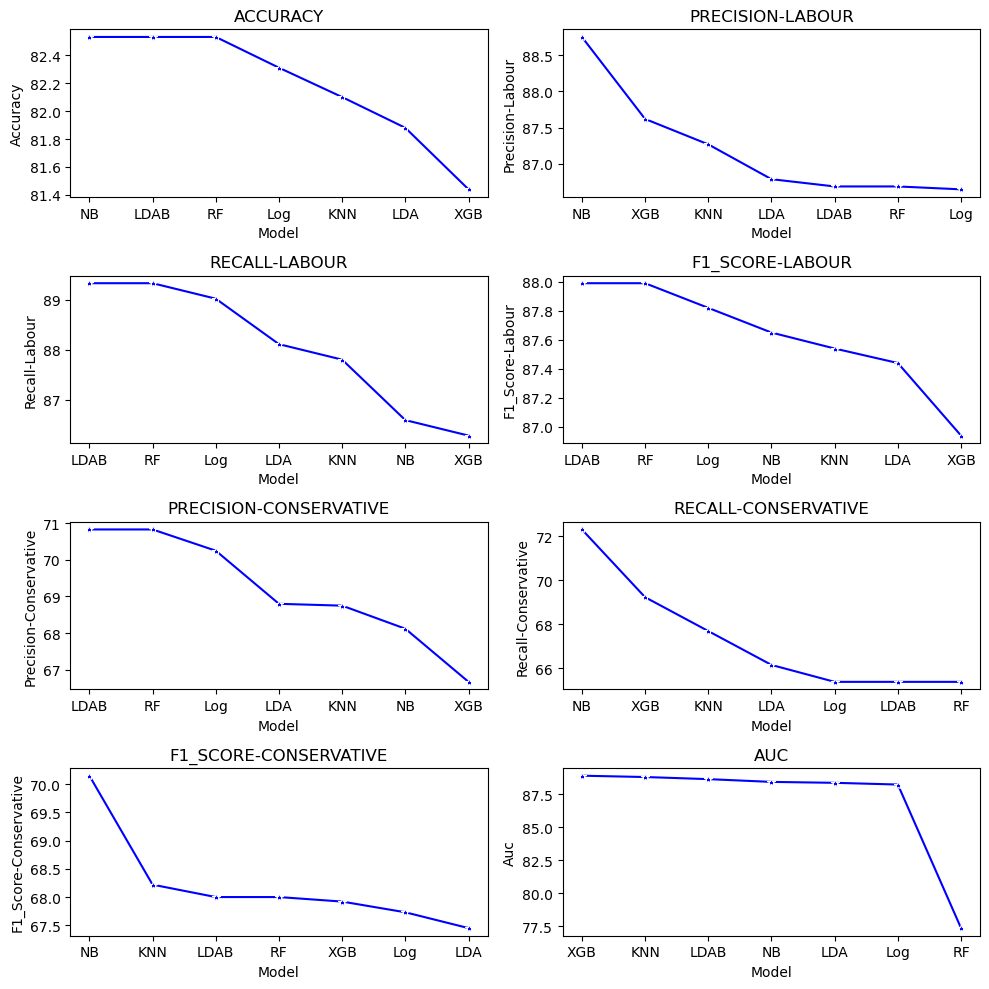

In [109]:
fig,axes = plt.subplots(4,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
cols = list(metric_df_test.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.lineplot(x='Model',y=i,data=metric_df_test.sort_values(by = i,ascending=False),ax=j,color='blue',marker="*").set_title(i.upper())
    plt.tight_layout()

In [110]:
mod = ['NB','Log','LDA','KNN','LDAB','XGB','RF']
acc=[]
pre_L=[]
rec_L=[]
f1_L=[]
pre_C=[]
rec_C=[]
f1_C=[]
train_pred = [pred_train_NB_model,pred_train_log_model_best,pred_train_lda_model,pred_train_KNN_model,pred_train_LDAB_model,
             pred_train_XGB_model,pred_train_RF_model]
for i in train_pred:
    acc.append(round(accuracy_score(y_train,i)*100,2))
    pre_L.append(round(precision_score(y_train,i,zero_division=0,pos_label=0)*100,2))
    rec_L.append(round(recall_score(y_train,i,pos_label=0)*100,2))
    f1_L.append(round(f1_score(y_train,i,pos_label=0)*100,2))
    pre_C.append(round(precision_score(y_train,i,zero_division=0,pos_label=1)*100,2))
    rec_C.append(round(recall_score(y_train,i,pos_label=1)*100,2))
    f1_C.append(round(f1_score(y_train,i,pos_label=1)*100,2))
metric_df_train = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision-Labour':pre_L,'Recall-Labour':rec_L,'F1_Score-Labour':f1_L,'Precision-Conservative':pre_C,'Recall-Conservative':rec_C,'F1_Score-Conservative':f1_C})    
metric_df_train

,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative
0,NB,83.32,87.58,88.30,87.94,73.62,72.29,72.95
1,Log,84.07,86.74,90.75,88.70,77.18,69.28,73.02
2,LDA,83.69,86.96,89.80,88.35,75.65,70.18,72.81
3,KNN,84.16,86.95,90.61,88.74,77.08,69.88,73.30
4,LDAB,83.88,86.51,90.75,88.58,77.03,68.67,72.61
5,XGB,91.57,92.60,95.37,93.97,89.03,83.13,85.98
6,RF,84.82,86.31,92.65,89.37,80.58,67.47,73.44


In [111]:
metric_auc_train = pd.DataFrame({'Model':mod,'Auc':[auc_train_NB,auc_train_log,auc_train_lda,auc_train_KNN,auc_train_LDAB,auc_train_XGB,auc_train_RF]})
metric_auc_train["Auc"] = round(metric_auc_train["Auc"]*100,2)
metric_auc_train

,Model,Auc
0,NB,88.65
1,Log,88.94
2,LDA,88.92
3,KNN,90.50
4,LDAB,88.93
5,XGB,96.63
6,RF,91.23


In [112]:
metric_df_train = metric_df_train.merge(metric_auc_train)

In [113]:
metric_df_train

,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative,Auc
0,NB,83.32,87.58,88.30,87.94,73.62,72.29,72.95,88.65
1,Log,84.07,86.74,90.75,88.70,77.18,69.28,73.02,88.94
2,LDA,83.69,86.96,89.80,88.35,75.65,70.18,72.81,88.92
3,KNN,84.16,86.95,90.61,88.74,77.08,69.88,73.30,90.50
4,LDAB,83.88,86.51,90.75,88.58,77.03,68.67,72.61,88.93
5,XGB,91.57,92.60,95.37,93.97,89.03,83.13,85.98,96.63
6,RF,84.82,86.31,92.65,89.37,80.58,67.47,73.44,91.23


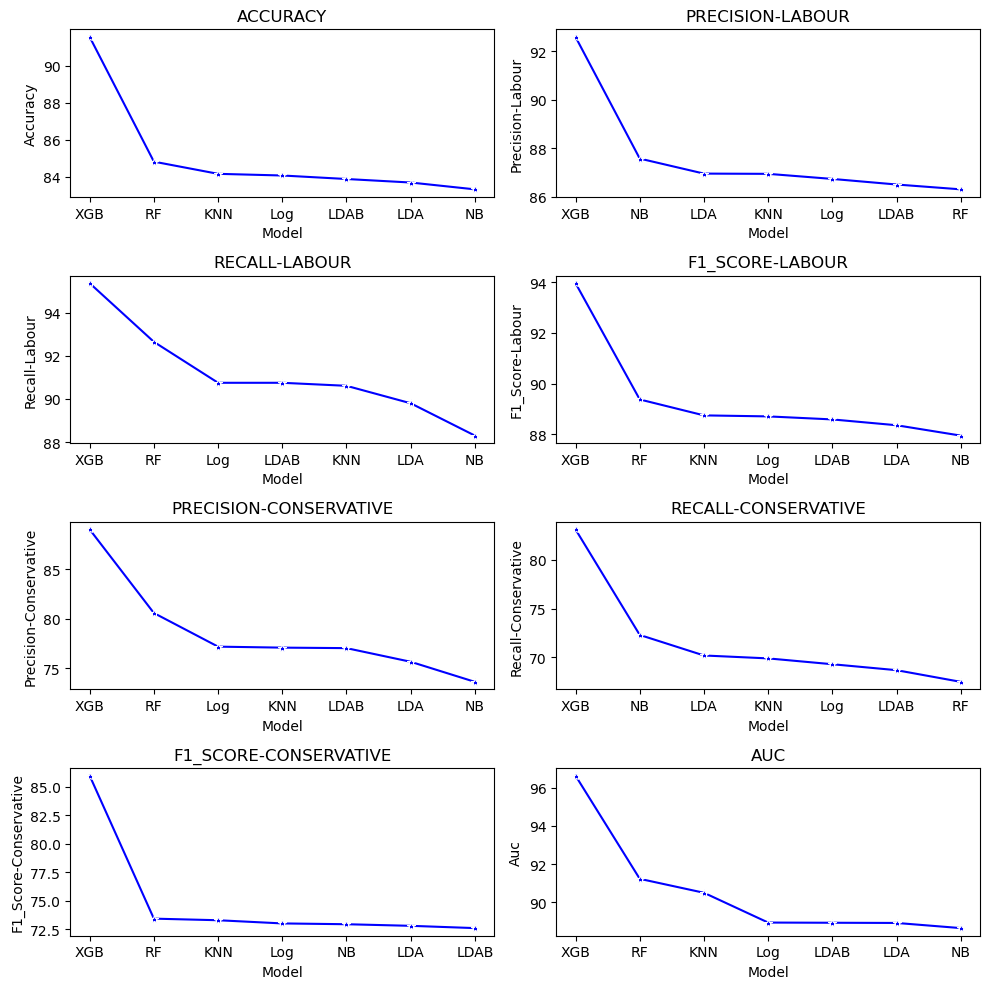

In [114]:
fig,axes = plt.subplots(4,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
cols = list(metric_df_train.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.lineplot(x='Model',y=i,data=metric_df_train.sort_values(by = i,ascending=False),ax=j,color='blue',marker="*").set_title(i.upper())
    plt.tight_layout()

In [115]:
metric_df_train.style.set_caption("Train Scores").set_precision(2).background_gradient()

C:\Users\skrsk\AppData\Local\Temp\ipykernel_6992\1694369934.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  metric_df_train.style.set_caption("Train Scores").set_precision(2).background_gradient()


,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative,Auc
0,NB,83.32,87.58,88.30,87.94,73.62,72.29,72.95,88.65
1,Log,84.07,86.74,90.75,88.70,77.18,69.28,73.02,88.94
2,LDA,83.69,86.96,89.80,88.35,75.65,70.18,72.81,88.92
3,KNN,84.16,86.95,90.61,88.74,77.08,69.88,73.30,90.50
4,LDAB,83.88,86.51,90.75,88.58,77.03,68.67,72.61,88.93
5,XGB,91.57,92.60,95.37,93.97,89.03,83.13,85.98,96.63
6,RF,84.82,86.31,92.65,89.37,80.58,67.47,73.44,91.23


In [116]:
metric_df_test.style.set_caption("Test Scores").set_precision(2).background_gradient()

C:\Users\skrsk\AppData\Local\Temp\ipykernel_6992\242059194.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  metric_df_test.style.set_caption("Test Scores").set_precision(2).background_gradient()


,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative,Auc
0,NB,82.53,88.75,86.59,87.65,68.12,72.31,70.15,88.45
1,Log,82.31,86.65,89.02,87.82,70.25,65.38,67.73,88.25
2,LDA,81.88,86.79,88.11,87.44,68.80,66.15,67.45,88.38
3,KNN,82.10,87.27,87.80,87.54,68.75,67.69,68.22,88.82
4,LDAB,82.53,86.69,89.33,87.99,70.83,65.38,68.00,88.66
5,XGB,81.44,87.62,86.28,86.94,66.67,69.23,67.92,88.92
6,RF,82.53,86.69,89.33,87.99,70.83,65.38,68.00,77.36


In [117]:
model_log.fit(X_train_sca, y_train)
pred_train_log_model_sca = model_log.predict(X_train_sca)
pred_test_log_model_sca = model_log.predict(X_test_sca)
print('Train Accuracy: {}'.format(model_log.score(X_train_sca,y_train)))
print('Test Accuracy: {}'.format(model_log.score(X_test_sca,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_log_model_sca))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_log_model_sca))

Train Accuracy: 0.8397375820056232
Test Accuracy: 0.8209606986899564

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [118]:
model_LDA_0.fit(X_train_sca, y_train)
pred_train_lda_sca = model_LDA_0.predict(X_train_sca)
pred_test_lda_sca = model_LDA_0.predict(X_test_sca)
print('Train Accuracy: {}'.format(model_LDA_0.score(X_train_sca,y_train)))
print('Test Accuracy: {}'.format(model_LDA_0.score(X_test_sca,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_lda_sca))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_lda_sca))

Train Accuracy: 0.8369259606373008
Test Accuracy: 0.8165938864628821

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



In [119]:
mod = ['Log','Log_scaled','LDA','LDA_scaled']
acc=[]
pre_L=[]
rec_L=[]
f1_L=[]
pre_C=[]
rec_C=[]
f1_C=[]
test_pred_sca = [pred_test_log_model,pred_test_log_model_sca,pred_test_lda_model,pred_test_lda_sca]
for i in test_pred_sca:
    acc.append(round(accuracy_score(y_test,i)*100,2))
    pre_L.append(round(precision_score(y_test,i,zero_division=0,pos_label=0)*100,2))
    rec_L.append(round(recall_score(y_test,i,pos_label=0)*100,2))
    f1_L.append(round(f1_score(y_test,i,pos_label=0)*100,2))
    pre_C.append(round(precision_score(y_test,i,zero_division=0,pos_label=1)*100,2))
    rec_C.append(round(recall_score(y_test,i,pos_label=1)*100,2))
    f1_C.append(round(f1_score(y_test,i,pos_label=1)*100,2))
metric_df_sca = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision-Labour':pre_L,'Recall-Labour':rec_L,'F1_Score-Labour':f1_L,'Precision-Conservative':pre_C,'Recall-Conservative':rec_C,'F1_Score-Conservative':f1_C})    
metric_df_sca

,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative
0,Log,82.31,86.65,89.02,87.82,70.25,65.38,67.73
1,Log_scaled,82.10,86.61,88.72,87.65,69.67,65.38,67.46
2,LDA,81.88,86.79,88.11,87.44,68.80,66.15,67.45
3,LDA_scaled,81.66,86.53,88.11,87.31,68.55,65.38,66.93


In [120]:
metric_df_sca[0:2].style.set_caption("Before and After Scaling - Log").set_precision(2).background_gradient()

C:\Users\skrsk\AppData\Local\Temp\ipykernel_6992\67868261.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  metric_df_sca[0:2].style.set_caption("Before and After Scaling - Log").set_precision(2).background_gradient()


,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative
0,Log,82.31,86.65,89.02,87.82,70.25,65.38,67.73
1,Log_scaled,82.10,86.61,88.72,87.65,69.67,65.38,67.46


In [121]:
metric_df_sca[2:].style.set_caption("Before and After Scaling - Log").set_precision(2).background_gradient()

C:\Users\skrsk\AppData\Local\Temp\ipykernel_6992\3973215975.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  metric_df_sca[2:].style.set_caption("Before and After Scaling - Log").set_precision(2).background_gradient()


,Model,Accuracy,Precision-Labour,Recall-Labour,F1_Score-Labour,Precision-Conservative,Recall-Conservative,F1_Score-Conservative
2,LDA,81.88,86.79,88.11,87.44,68.80,66.15,67.45
3,LDA_scaled,81.66,86.53,88.11,87.31,68.55,65.38,66.93
